In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing  
import seaborn as sb
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Manual Feature Selection

In [ ]:
def get_correlation_matrix(df, filepath):
  df_corr = df.corr()
  sb.set(rc={'figure.figsize': (20, 20)})
  sb.heatmap(df_corr, cmap="Blues", center=0, annot=True)
  #plt.savefig(filepath)
  plt.show()
  #plt.close()
  return

In [ ]:
# data_vol = pd.read_csv('/content/drive/MyDrive/IndexCoop Capstone/DPI analysis/datasets/DPI Trading Vol.csv', index_col='day')
# data_vol.drop(columns=['product'], inplace=True)
# data_vol.index = data_vol.index.rename('Date')
# data_vol.index = data_vol.index.astype('datetime64[ns]') 
# data_vol

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_Final.csv', index_col='Date')
# data_set.index = data_set.index.astype('datetime64[ns]')
data_set

,usd_volume,av,aum,token_a_amount,net_flow,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-13,9.408115e+05,4.920000e+06,13413076.12,5865.240742,314475.05190,3.403257,51.136552,581.773174,4.537299,115.628708,...,2.98,23.97,0.79,80.4,55.4,4.8,0.96,3511.93,11863.90,0.09
2020-10-14,1.080000e+06,4.960000e+06,14039166.27,5581.629425,729329.67920,3.256042,52.657986,578.352472,4.451809,111.031146,...,2.98,23.97,0.79,80.4,55.4,4.8,0.97,3488.67,11768.73,0.09
2020-10-15,1.300000e+06,4.540000e+06,14293954.95,6430.021359,861171.96300,3.056167,47.815486,564.597854,4.150760,107.247875,...,2.98,23.97,0.83,80.4,55.4,4.8,0.93,3483.34,11713.87,0.10
2020-10-16,8.884948e+05,3.740000e+06,13884925.20,4341.712775,344120.71360,3.139778,41.638785,548.252076,3.987229,103.699465,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
2020-10-17,6.013777e+05,1.650000e+06,13584918.72,4010.875556,-30418.51613,3.047424,41.185764,552.822896,3.938792,103.807257,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,1.116083e+05,2.003085e+05,28167929.92,801.573962,0.00000,5.843785,75.897042,657.364250,2.463340,61.694049,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-24,1.004768e+05,1.868585e+05,28644520.91,568.615424,0.00000,5.917444,76.513681,680.139806,2.490632,62.430549,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-25,5.423181e+04,1.846635e+05,28202207.10,385.704346,0.00000,5.836500,75.651299,693.700187,2.405306,62.453069,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99


In [ ]:
data_set['pre_net_flow'] = data_set['net_flow'].shift()
data_set

,usd_volume,av,aum,token_a_amount,net_flow,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,...,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR,pre_net_flow
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-13,9.408115e+05,4.920000e+06,13413076.12,5865.240742,314475.05190,3.403257,51.136552,581.773174,4.537299,115.628708,...,23.97,0.79,80.4,55.4,4.8,0.96,3511.93,11863.90,0.09,NaN
2020-10-14,1.080000e+06,4.960000e+06,14039166.27,5581.629425,729329.67920,3.256042,52.657986,578.352472,4.451809,111.031146,...,23.97,0.79,80.4,55.4,4.8,0.97,3488.67,11768.73,0.09,314475.0519
2020-10-15,1.300000e+06,4.540000e+06,14293954.95,6430.021359,861171.96300,3.056167,47.815486,564.597854,4.150760,107.247875,...,23.97,0.83,80.4,55.4,4.8,0.93,3483.34,11713.87,0.10,729329.6792
2020-10-16,8.884948e+05,3.740000e+06,13884925.20,4341.712775,344120.71360,3.139778,41.638785,548.252076,3.987229,103.699465,...,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09,861171.9630
2020-10-17,6.013777e+05,1.650000e+06,13584918.72,4010.875556,-30418.51613,3.047424,41.185764,552.822896,3.938792,103.807257,...,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09,344120.7136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,1.116083e+05,2.003085e+05,28167929.92,801.573962,0.00000,5.843785,75.897042,657.364250,2.463340,61.694049,...,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99,-155153.7322
2022-09-24,1.004768e+05,1.868585e+05,28644520.91,568.615424,0.00000,5.917444,76.513681,680.139806,2.490632,62.430549,...,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99,0.0000
2022-09-25,5.423181e+04,1.846635e+05,28202207.10,385.704346,0.00000,5.836500,75.651299,693.700187,2.405306,62.453069,...,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99,0.0000


In [ ]:
# new_d = pd.DataFrame()
# new_d = pd.concat([data_vol,data_set], axis=1) 
# new_d= new_d.dropna()
# new_d.to_csv('/content/drive/MyDrive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_Final.csv')

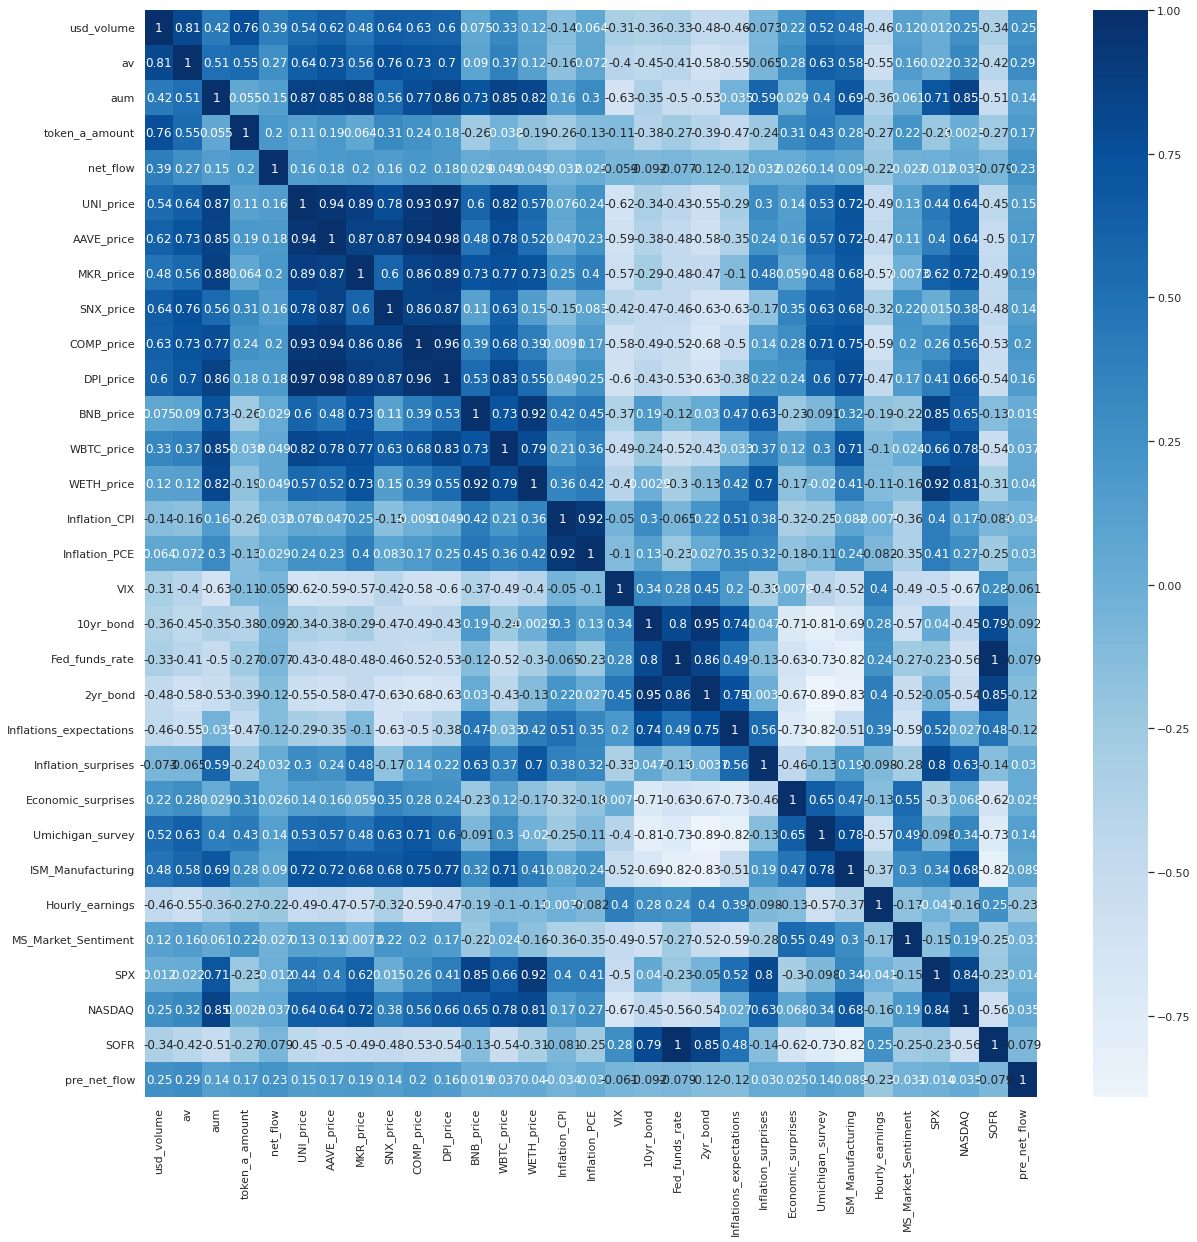

In [ ]:
get_correlation_matrix(data_set,'correlation_matirx_DPI') 

**Features to include:** mainly based on the correlation:
Random Forest
- Prices:'UNI_price', 'BNB_price' 'SNX_price', 'COMP_price' 
-'pre_net_flow'
- Macro & Market:'SOFR', 'VIX', 'NASDAQ', 'Hourly_earnings', 'usd_volume'

KNN:
- Macro & Market: 'VIX', 'Economic_surprises', 'Fed_funds_rate', 'SPX','SOFR''MS_Market_Sentiment', 'Inflation_PCE', 'Inflation_CPI','token_a_amount'
- Prices:'UNI_price', 'WETH_price', 'BNB_price', 'COMP_price'  

# Data Preprocessing

In [ ]:
X = data_set[1:].copy()
X.drop(['net_flow','av '], axis = 1, inplace = True)
y = data_set['net_flow'][1:].copy()

In [ ]:
X_scaled = pd.DataFrame(preprocessing.scale(X))
X_scaled.columns = X.columns
# X_scaled.rename(columns = {'CPI CHNG Index': 'CPI_CHNG_Index', 'VIX Index': 'VIX_Index', 'USGG10YR Index': 'USGG10YR_Index', 
#              'NYCNM1IR Index': 'NYCNM1IR_Index', 'CSIIUSD Index': 'CSIIUSD_Index', 
#              'ECSURPUS Index': 'ECSURPUS_Index', 'CONSSENT Index': 'CONSSENT_Index',
#              'NAPMPMI Index': 'NAPMPMI_Index', 'AHE YOY% Index': 'AHE_YOY_Index',
#              'MSXAMSIL Index': 'MSXAMSIL_Index', 'SPX Index': 'SPX_Index'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 123) 
X_train = X_scaled.loc[:625] 
y_train = y.loc[:'2022-07-01'] 
X_test = X_scaled.loc[625:] 
y_test = y.loc['2022-07-01':] 

In [ ]:
y

Date
2020-10-13    314475.05190
2020-10-14    729329.67920
2020-10-15    861171.96300
2020-10-16    344120.71360
2020-10-17    -30418.51613
                  ...     
2022-09-23         0.00000
2022-09-24         0.00000
2022-09-25         0.00000
2022-09-26   -238218.46220
2022-09-27    -83821.61569
Name: net_flow, Length: 715, dtype: float64

# Feature Importance

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
def feature_importance(classifier, X_train, y_train, cv_times):
  importance_array = []
  mean_importance = []
  name = classifier.__class__.__name__.split('.')[-1]

  models = cross_validate(estimator=classifier, X=X_train, y=y_train, cv=cv_times, return_estimator = True)
  for i in range(cv_times):
    importance = models['estimator'][i].feature_importances_
    importance_array.append(importance)
  for j in range(X_train.shape[1]):
    temp = 0
    for i in range(cv_times):
      temp = temp + importance_array[i][j]
    mean_importance.append(temp/cv_times)
  return mean_importance

In [ ]:
def plot_importance(index_array, importance):
  FI = pd.Series(importance, index = index_array)
  FI = FI.sort_values(ascending = False)
  FI = FI[:8]
  fig = plt.figure(figsize=(12,5))
  plt.bar(FI.index,FI.values,color="blue")
  plt.xlabel('features')
  plt.ylabel('importances')
  plt.show()

In [ ]:
feature_names = X_train.columns.values

# Linear Regression

## Ordinary Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
ols_train = LinearRegression().fit(X_train, y_train)
y_train_predicted = ols_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ols_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.3016205580618804
Test set R-squared is: -0.0614173465472434


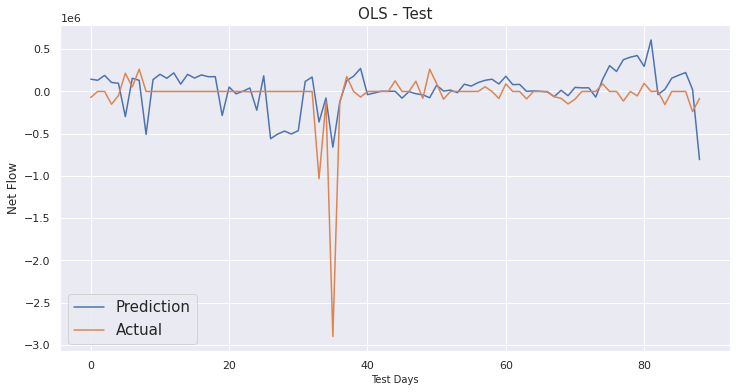

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("OLS - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

## Forward Model Selection: AIC

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
def forward_select(X, y):
  data = pd.concat([X, y], axis = 1)
  variate = set(X.columns)
  selected = []
  # set the scores to be infinite
  current_score, best_new_score = float('inf'), float('inf')
  # perform the forward selection
  while variate:
    aic_with_variate = []
    for candidate in variate:
      # set the regression model
      print(candidate)
      formula = "{}~{}".format(y.columns[0], "+".join(selected + [candidate]))
      print(formula)
      aic = smf.ols(formula = formula, data = data).fit().aic
      aic_with_variate.append((aic,candidate))
    aic_with_variate.sort(reverse = True)
    best_new_score, best_candidate = aic_with_variate.pop()
    if current_score > best_new_score:
      variate.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
      print("AIC is {}, continuing!".format(current_score))
    else:
      print("Forward Selection Done")
      break
  # final regression model
  formula = "{}~{}".format(y.columns[0], "+".join(selected))
  print("Final Regression model is {}".format(formula))
  model = smf.ols(formula = formula, data = data).fit()
  return(model)

In [ ]:
X_train.columns

Index(['usd_volume', 'aum', 'token_a_amount', 'UNI_price', 'AAVE_price',
       'MKR_price', 'SNX_price', 'COMP_price', 'DPI_price', 'BNB_price',
       'WBTC_price', 'WETH_price', 'Inflation_CPI', 'Inflation_PCE', 'VIX',
       '10yr_bond', 'Fed_funds_rate', '2yr_bond', 'Inflations_expectations',
       'Inflation_surprises', 'Economic_surprises', 'Umichigan_survey',
       'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SPX',
       'NASDAQ', 'SOFR'],
      dtype='object')

In [ ]:
aic_train = forward_select(X_train, pd.DataFrame(y_train))

SOFR
net_flow~SOFR


ValueError: ignored

In [ ]:
y_train_predicted4 = aic_train.predict(X_train)
rmse_train4 = r2_score(y_true = y_train, y_pred = y_train_predicted4)
y_test_predicted4 = aic_train.predict(X_test)
rmse_test4 = r2_score(y_true = y_test, y_pred = y_test_predicted4)
print("Training set R-squared is: {}".format(rmse_train4))
print("Test set R-squared is: {}".format(rmse_test4))

NameError: ignored

In [ ]:
aic_train.summary()

NameError: ignored

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_train = Ridge(alpha = 1.0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

Training set R-squared is: 0.2994165744270054
Test set R-squared is: 0.05346471092925065


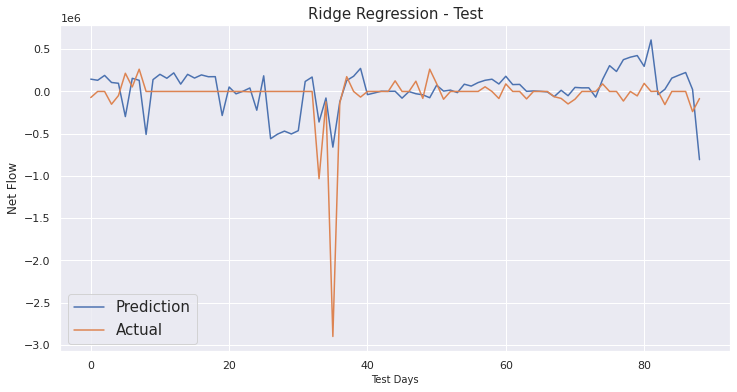

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("Ridge Regression - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

## LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_train = Lasso().fit(X_train, y_train)
y_train_predicted3 = lasso_train.predict(X_train)
rmse_train3 = r2_score(y_true = y_train, y_pred = y_train_predicted3)
y_test_predicted3 = lasso_train.predict(X_test)
rmse_test3 = r2_score(y_true = y_test, y_pred = y_test_predicted3)
print("Training set R-squared is: {}".format(rmse_train3))
print("Test set R-squared is: {}".format(rmse_test3))

Training set R-squared is: 0.3016134102622481
Test set R-squared is: -0.08013082644691893


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.654e+14, tolerance: 1.343e+11
  model = cd_fast.enet_coordinate_descent(


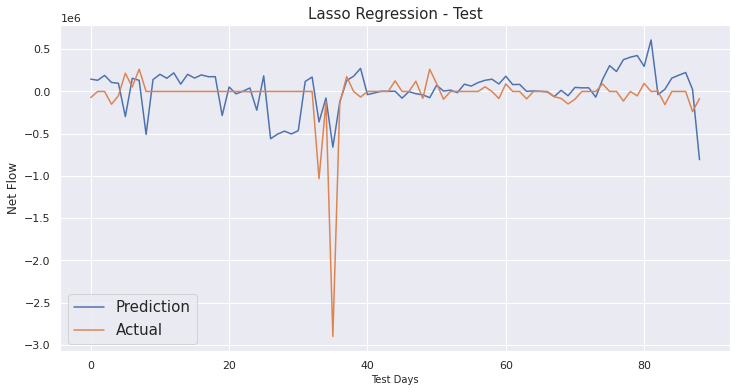

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("Lasso Regression - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

#K Nearest Neighbours

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
KNN_train = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
y_train_predicted = KNN_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = KNN_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.34362707376655244
Test set R-squared is: 0.4262556976614228


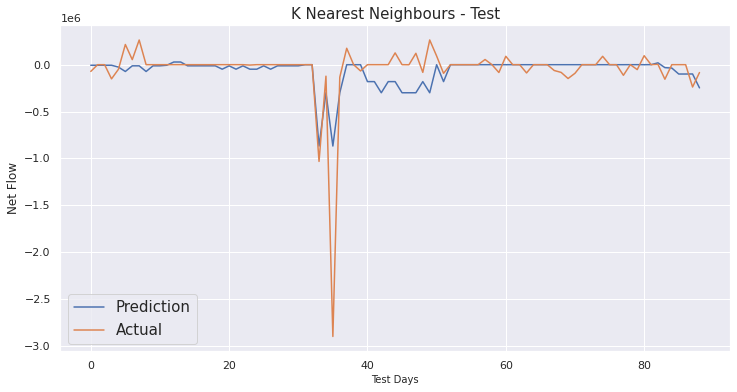

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("K Nearest Neighbours - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVM_train = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
y_train_predicted = SVM_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = SVM_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: -0.004334067168392908
Test set R-squared is: -0.019274748328849345


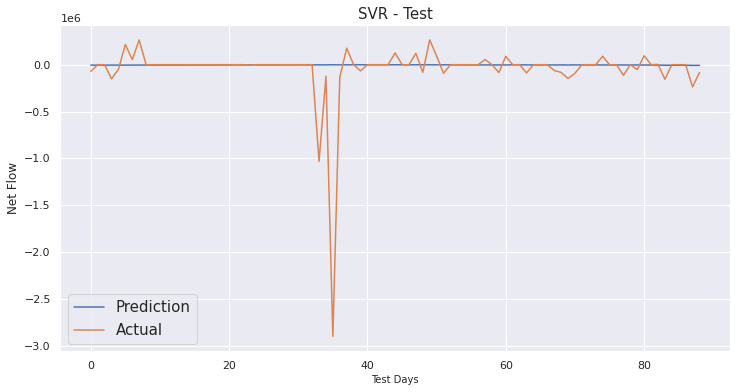

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("SVR - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

# Ensemble Trees

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def regression_cross_validation_score(regressor, x, y, cv_times=5):
  results = []
  name = regressor.__class__.__name__.split('.')[-1]

  r2 = cross_val_score(estimator=regressor, X=x, y=y, cv=cv_times, scoring='r2')
  results.append([name, r2.mean()])

  return results

In [ ]:
RF_train = RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1, random_state=42).fit(X_train, y_train)
y_train_predicted = RF_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = RF_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.8814835405403529
Test set R-squared is: 0.13467995583073122


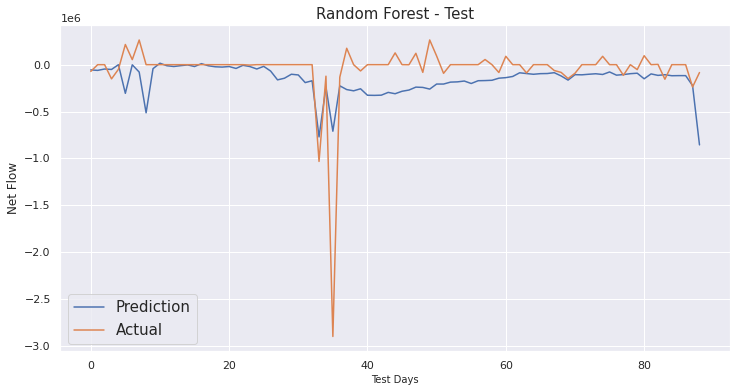

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("Random Forest - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

In [ ]:
RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1, random_state=42)

RandomForestRegressor(max_features=10, n_jobs=-1, random_state=42)

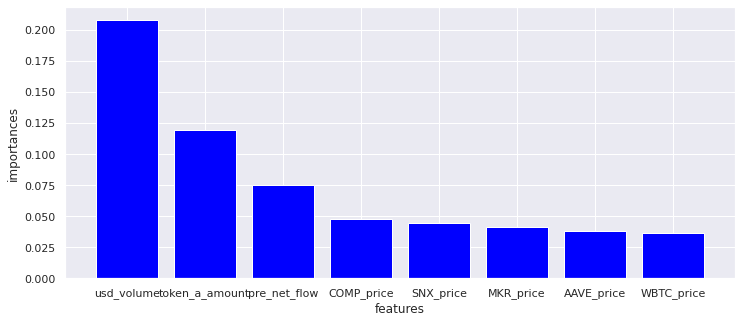

In [ ]:
RF = RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1)
RF_importance = feature_importance(RF, X_train, y_train, 5)
plot_importance(feature_names, RF_importance)

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ET_train = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = ET_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ET_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 1.0
Test set R-squared is: 0.1387988362256951


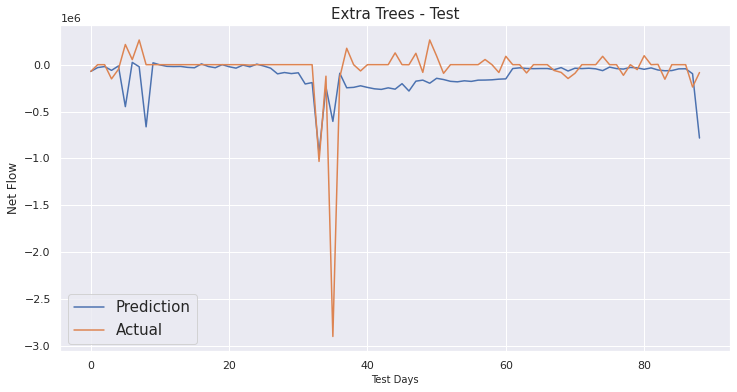

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("Extra Trees - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

# Boosting

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
AB_train = AdaBoostRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = AB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = AB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.6088227046583514
Test set R-squared is: -0.00373671287074151


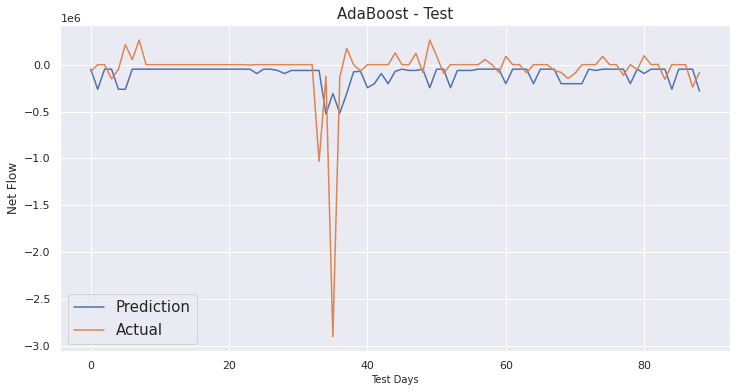

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("AdaBoost - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB_train = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_train_predicted = GB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = GB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.8935837110927047
Test set R-squared is: -0.19327686837623648


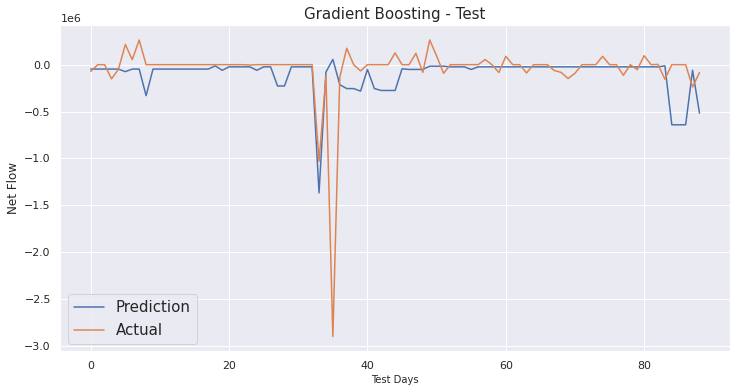

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("Gradient Boosting - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png') 

## XG Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB_train = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, random_state=42).fit(X_train, y_train)
y_train_predicted = XGB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = XGB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.862697947236444
Test set R-squared is: -0.1446574785762127


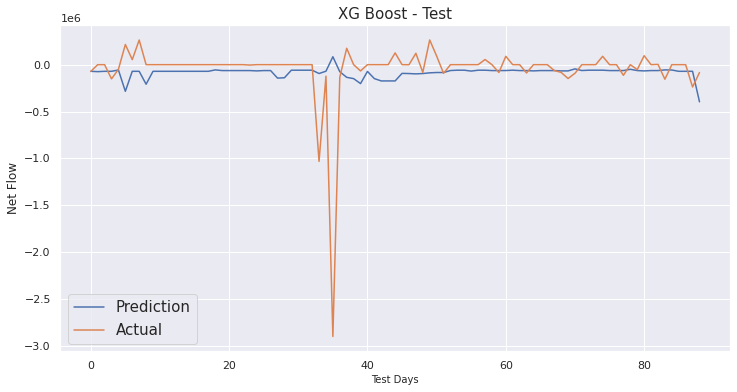

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("XG Boost - Test", fontsize=15)
plt.plot(y_test_predicted, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png')